# Spatial filtering using PIL (pillow)

### Faris D. Qadri

## Libraries and helper func


In [43]:
from PIL import Image
from PIL import ImageFilter

import matplotlib.pyplot as plt
import numpy as np

In [44]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"): # plotting side-by-side
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

<h2> Spatial Operations in Image Processing</h2>


## Linear  Filtering


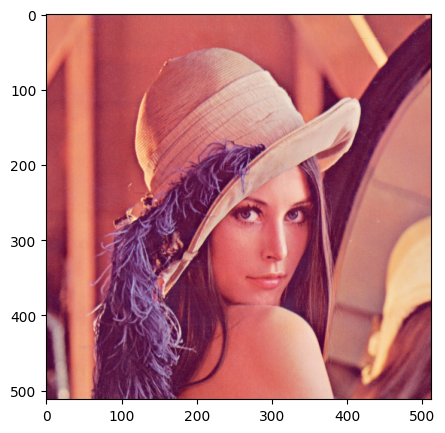

In [45]:
image = Image.open("lenna.png")

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

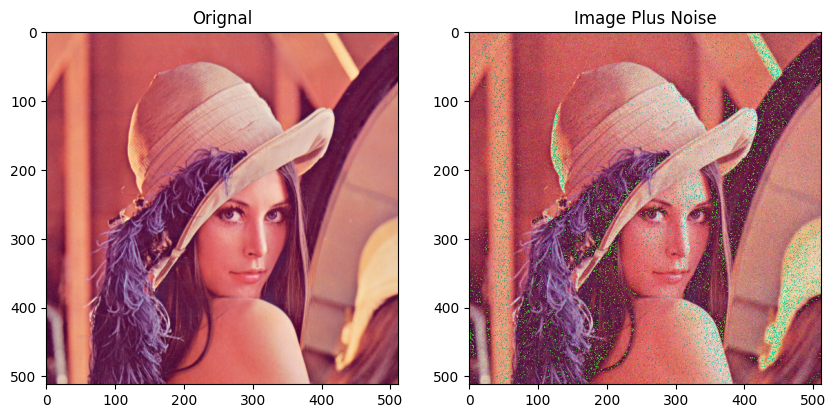

In [46]:
rows, cols = image.size
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image + noise
noisy_image = Image.fromarray(noisy_image)
plot_image(image, noisy_image, title_1="Orignal", title_2="Image Plus Noise")

### Filtering Noise


In [47]:
kernel = np.ones((5,5))/36 # kernel = filter
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

In [48]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

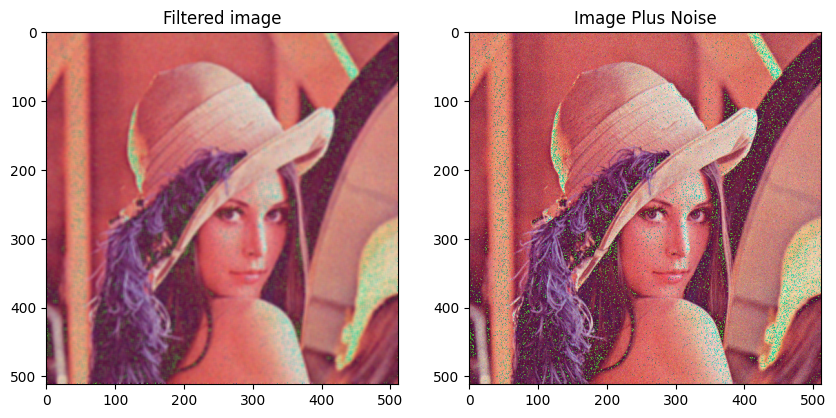

In [49]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

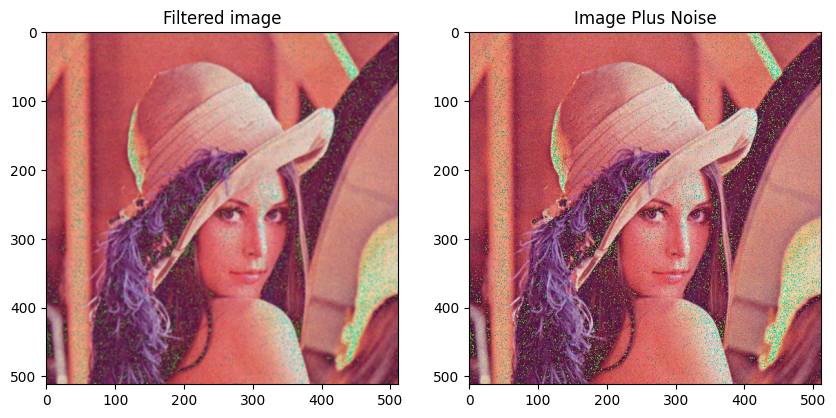

In [50]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel = np.ones((3,3))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

### Gaussian Blur


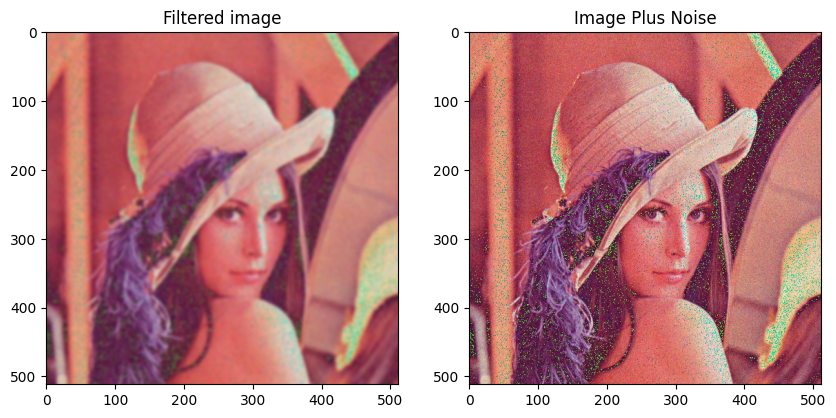

In [51]:
# Filters the images using GaussianBlur
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Lets try using a 4 by 4 kernel


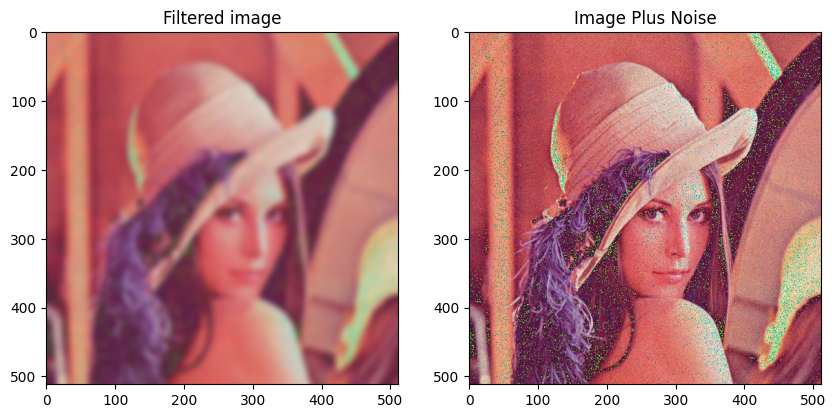

In [52]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

### Image Sharpening


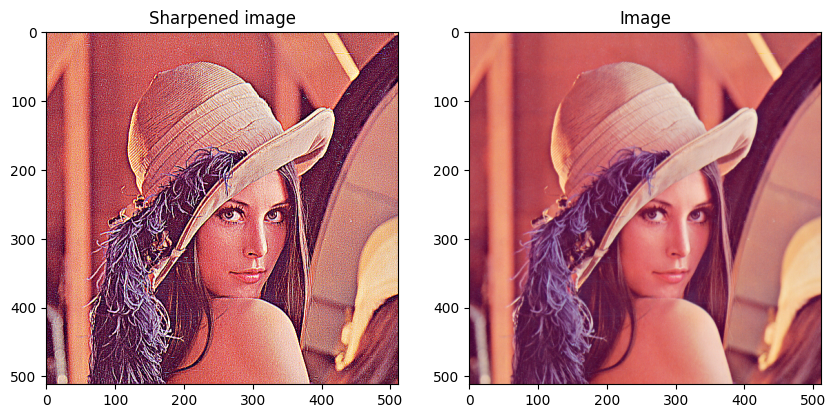

In [53]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())
# Applys the sharpening filter using kernel on the original image without noise
sharpened = image.filter(kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

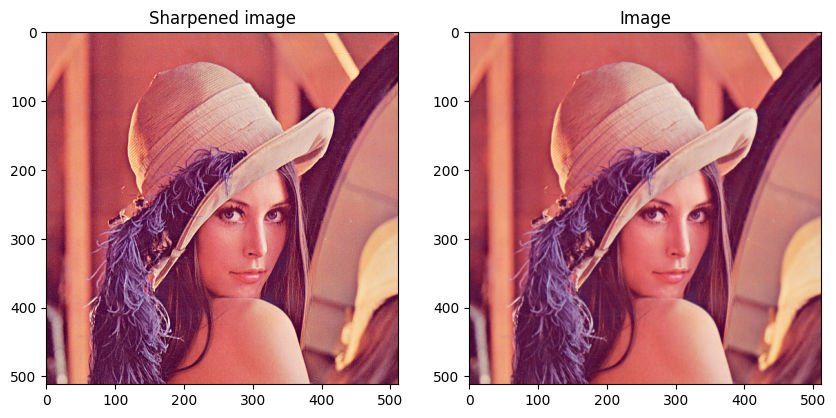

In [54]:
# Sharpends image using predefined image filter from PIL
sharpened = image.filter(ImageFilter.SHARPEN)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges


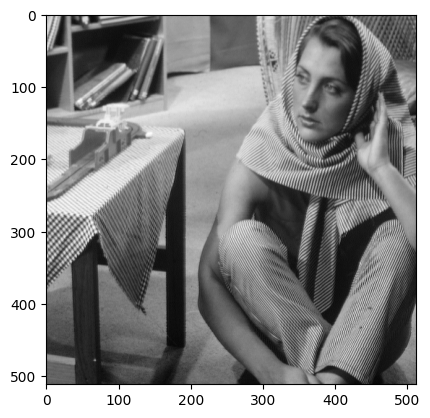

In [55]:
# Loads the image from the specified file
img_gray = Image.open('barbara.png')
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')

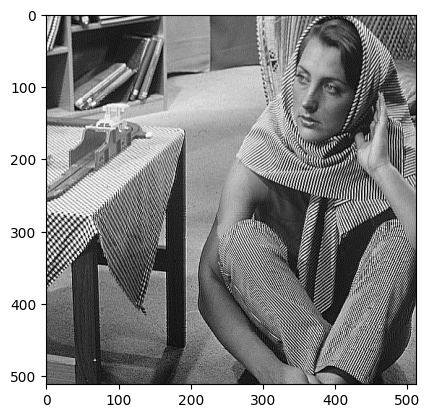

In [56]:
# Filters the images using EDGE_ENHANCE filter
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
# Renders the enhanced image
plt.imshow(img_gray ,cmap='gray')

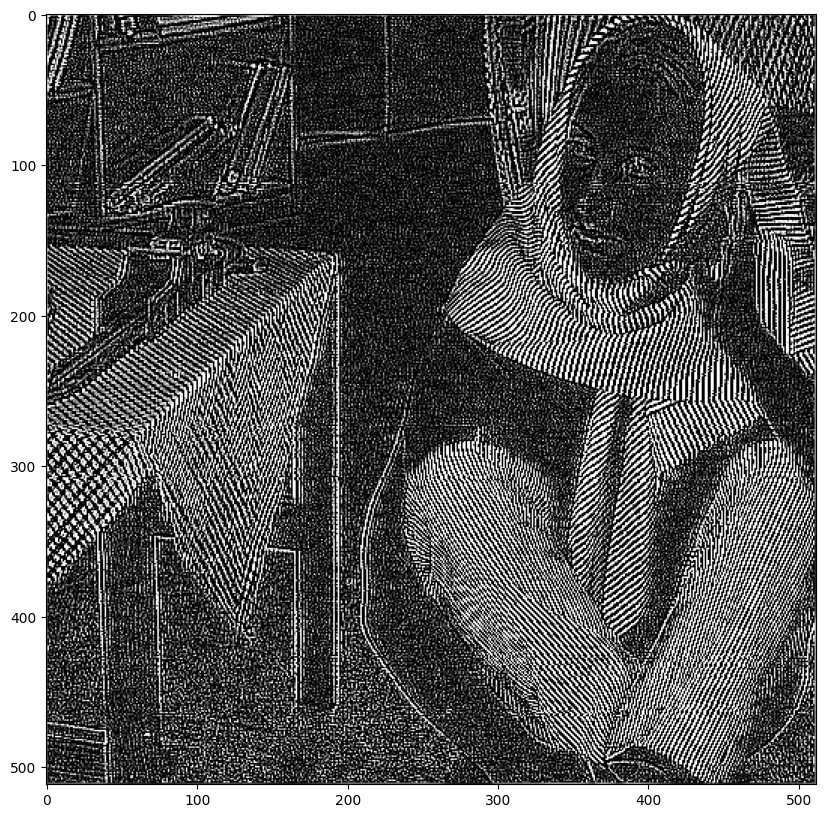

In [57]:
# Filters the images using FIND_EDGES filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
# Renders the filtered image
plt.figure(figsize=(10,10))
plt.imshow(img_gray ,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value. 


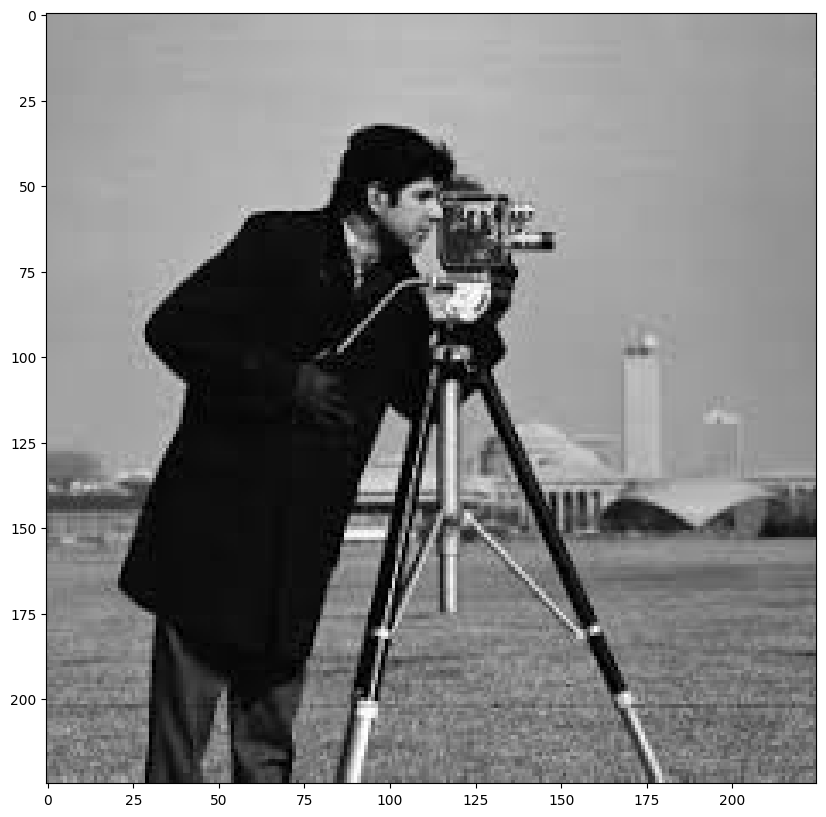

In [58]:
# Load the camera man image
image = Image.open("cameraman.jpeg")
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

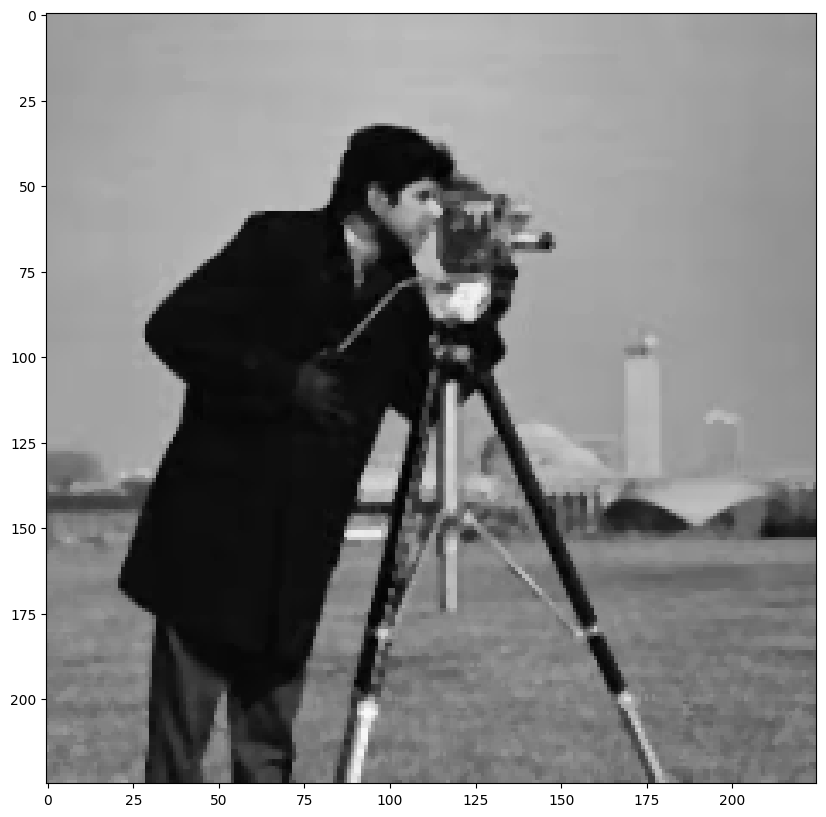

In [59]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")